In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [4]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

EXPLORATORY DATA ANALYSIS
#MISSING VALUES

<Axes: >

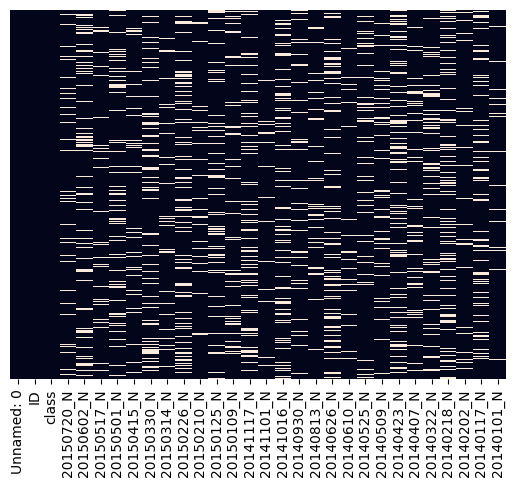

In [5]:
sns.heatmap(df.isnull(),yticklabels = False,cbar=False)

<Axes: xlabel='class', ylabel='count'>

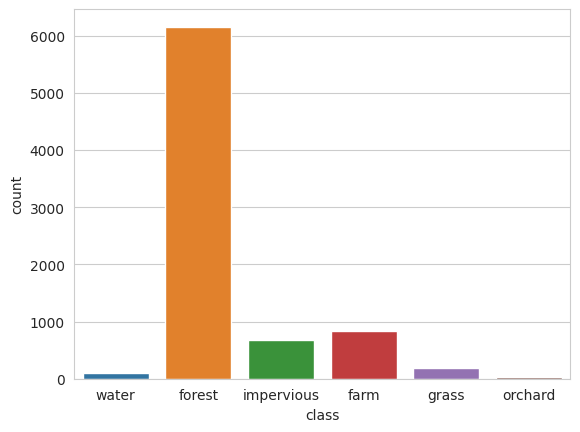

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df)

<Axes: xlabel='class', ylabel='20150720_N'>

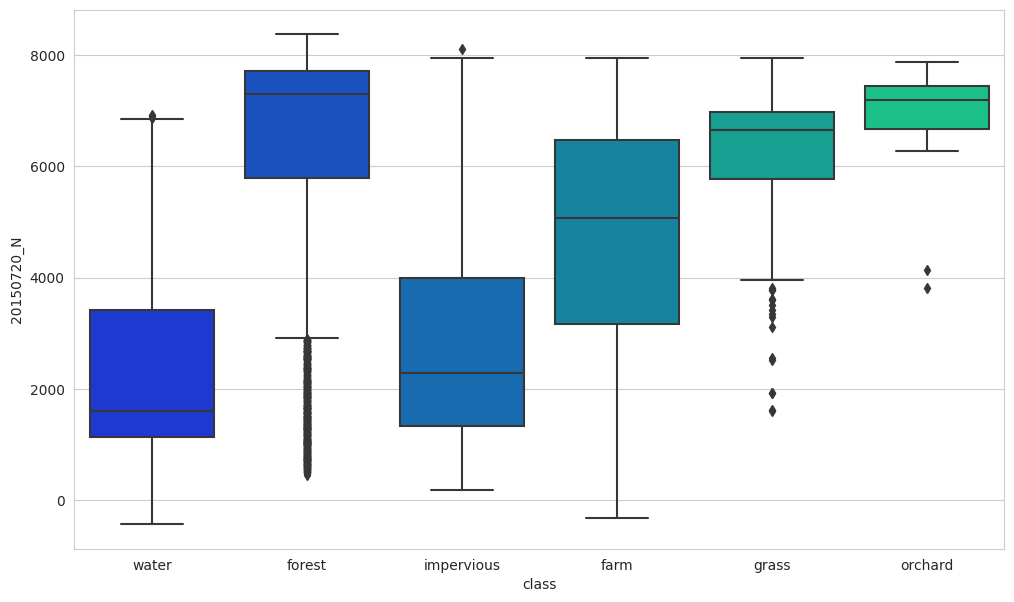

In [7]:
plt.figure(figsize = (12,7))
sns.boxplot(x='class',y='20150720_N',data=df,palette='winter')

In [8]:


# Select only the numeric columns for imputation (exclude 'ID', 'class', 'Unnamed: 0')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Initialize the Iterative Imputer
iter_imputer = IterativeImputer(random_state=0)

# Fit and transform the numeric data
df_imputed_numeric = pd.DataFrame(iter_imputer.fit_transform(df_numeric), columns=numeric_cols)

# Replace the original numeric columns with the imputed values
df[numeric_cols] = df_imputed_numeric

# Now df has missing numeric values imputed using IterativeImputer
df.head()


,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0.0,1.0,water,637.5950,658.668000,-1882.030000,-1924.36,997.904000,-1739.99000,630.087000,...,-35.446923,-1043.160,-1942.490000,267.138,475.77559,716.769497,211.328,-2203.020,-1180.190000,433.906
1,1.0,2.0,water,634.2400,593.705000,-1625.790000,-1672.32,914.198000,-692.38600,707.626000,...,41.908713,-933.934,-625.385000,120.059,364.85800,476.972000,220.878,-2250.000,-1360.560000,524.075
2,3.0,4.0,water,58.0174,-1599.160000,-5.598100,-1052.63,-180.877929,-1564.63000,259.537946,...,-1025.880000,368.622,864.339235,-1227.800,304.62100,-360.785839,369.214,-2202.120,-762.397818,-1343.550
3,4.0,5.0,water,72.5180,353.689639,380.436000,-1256.93,515.805000,-1413.18000,-802.942000,...,-1813.950000,155.624,542.065798,-924.073,432.15000,282.833000,298.320,-2197.360,-251.493331,-826.727
4,7.0,8.0,water,1136.4400,1191.949094,1530.713589,1647.83,1935.800000,169.42128,2158.980000,...,1535.000000,1959.430,-279.317000,-384.915,-113.40600,1020.720000,1660.650,-116.801,-568.050000,-1357.140


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df.drop(columns=['ID'], inplace=True)


label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


X = df.drop(columns=['class'])
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

        farm       0.77      0.67      0.72       168
      forest       0.96      0.99      0.97      1232
       grass       0.67      0.05      0.10        39
  impervious       0.66      0.87      0.75       134
     orchard       0.00      0.00      0.00         6
       water       0.00      0.00      0.00        21

    accuracy                           0.91      1600
   macro avg       0.51      0.43      0.42      1600
weighted avg       0.89      0.91      0.89      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [10]:
test_data = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')

ID = test_data['ID']
test_data.drop(['ID'],axis = 1 , inplace = True)

In [11]:
y_test = model.predict(test_data)
y_test

array([1, 1, 1, ..., 3, 3, 3])

In [12]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'impervious', 'impervious',
       'impervious'], dtype=object)

In [13]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

result

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,impervious
2841,2842,impervious
2842,2843,impervious
2843,2844,impervious


In [14]:
result.to_csv("submission.csv",index=False)